# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose as sdc
%matplotlib inline
sns.set()


# Loading Data

In [2]:
df = pd.read_csv('data/data1.csv')
df.head()


Date  Arrivals to Italy  Arrivals to Greek Islands  \
0  10/1/2015                343                       2631   
1  10/2/2015                  0                       4055   
2  10/3/2015                128                       6097   
3  10/4/2015                 62                       4763   
4  10/5/2015                  0                       5909   

   Departures to mainland Greece  Arrivals to fYRoM  Arrivals to Serbia  \
0                           2409               4370              5900.0   
1                           1215               5853              3700.0   
2                           4480               4202              3700.0   
3                           1513               5181              4250.0   
4                           7833               4282              3250.0   

   Arrivals to Croatia  Arrivals to Hungary  Arrivals to Slovenia  \
0                 4344               3667.0                   0.0   
1                 5546               4897.0                   0.0   
2                 6086               6056.0                   NaN   
3                 5065               5925.0                   0.0   
4                 6338               5952.0                   0.0   

   Arrivals to Austria  
0                 4550  
1                 2700  
2                 7100  
3                 5800  
4                 6100

# Removing nan

In [3]:
df = df.fillna(0.0)

In [4]:
df.head()

Date  Arrivals to Italy  Arrivals to Greek Islands  \
0  10/1/2015                343                       2631   
1  10/2/2015                  0                       4055   
2  10/3/2015                128                       6097   
3  10/4/2015                 62                       4763   
4  10/5/2015                  0                       5909   

   Departures to mainland Greece  Arrivals to fYRoM  Arrivals to Serbia  \
0                           2409               4370              5900.0   
1                           1215               5853              3700.0   
2                           4480               4202              3700.0   
3                           1513               5181              4250.0   
4                           7833               4282              3250.0   

   Arrivals to Croatia  Arrivals to Hungary  Arrivals to Slovenia  \
0                 4344               3667.0                   0.0   
1                 5546               4897.0                   0.0   
2                 6086               6056.0                   0.0   
3                 5065               5925.0                   0.0   
4                 6338               5952.0                   0.0   

   Arrivals to Austria  
0                 4550  
1                 2700  
2                 7100  
3                 5800  
4                 6100

# Initial look at the dataset

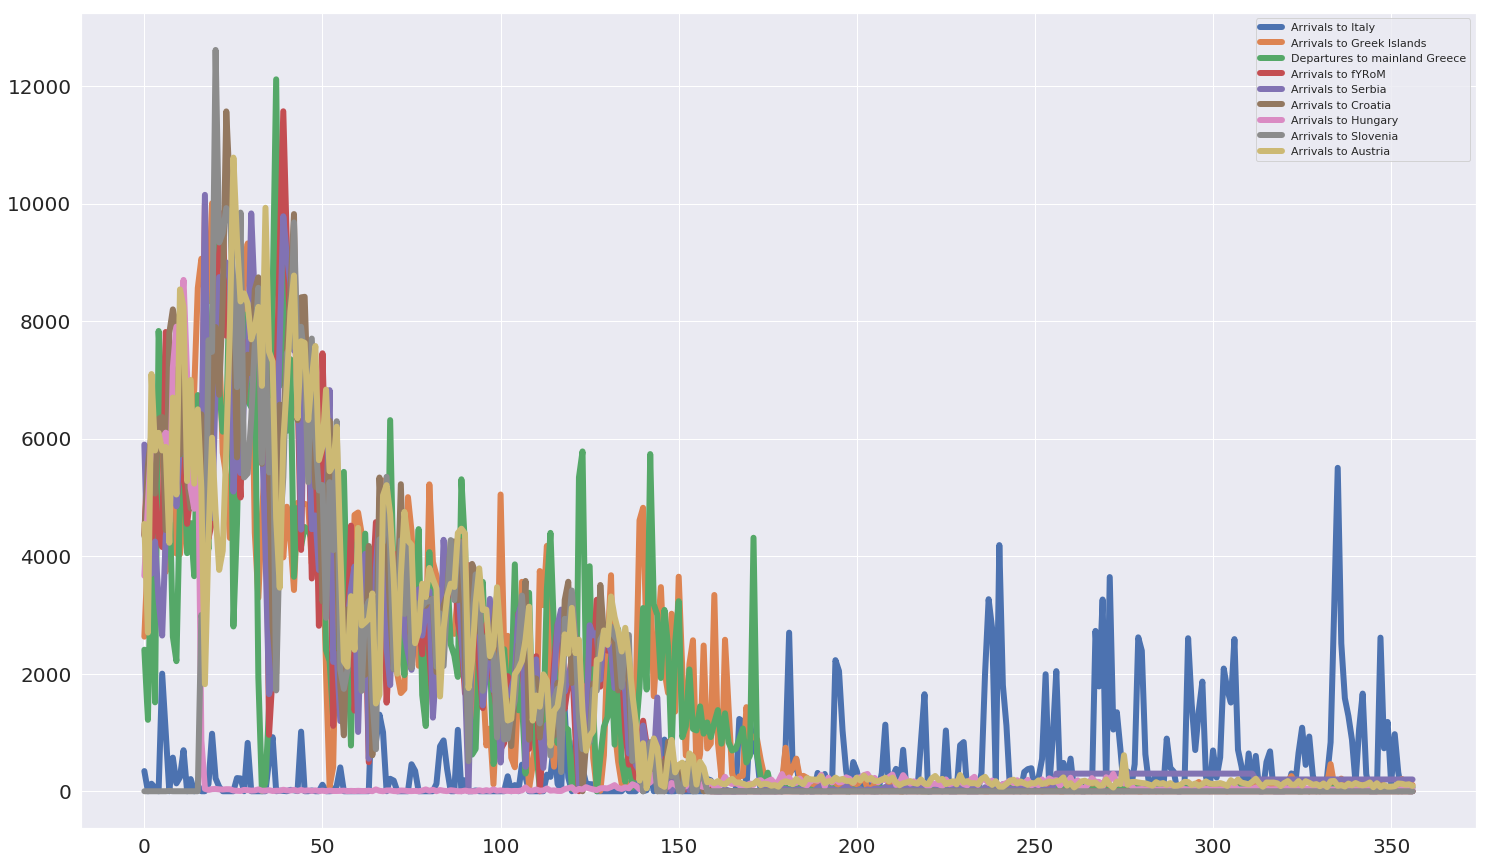

In [5]:
df.plot(figsize=(25,15), linewidth=6, fontsize=20)

# Dataframe info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 10 columns):
Date                             357 non-null object
Arrivals to Italy                357 non-null int64
Arrivals to Greek Islands        357 non-null int64
Departures to mainland Greece    357 non-null int64
Arrivals to fYRoM                357 non-null int64
Arrivals to Serbia               357 non-null float64
Arrivals to Croatia              357 non-null int64
Arrivals to Hungary              357 non-null float64
Arrivals to Slovenia             357 non-null float64
Arrivals to Austria              357 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 28.0+ KB


# Converting float type column to integer type

In [7]:
df = df.astype({"Arrivals to Hungary": int, "Arrivals to Serbia": int, "Arrivals to Slovenia": int})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 10 columns):
Date                             357 non-null object
Arrivals to Italy                357 non-null int64
Arrivals to Greek Islands        357 non-null int64
Departures to mainland Greece    357 non-null int64
Arrivals to fYRoM                357 non-null int64
Arrivals to Serbia               357 non-null int64
Arrivals to Croatia              357 non-null int64
Arrivals to Hungary              357 non-null int64
Arrivals to Slovenia             357 non-null int64
Arrivals to Austria              357 non-null int64
dtypes: int64(9), object(1)
memory usage: 28.0+ KB


In [9]:
df.head()

Date  Arrivals to Italy  Arrivals to Greek Islands  \
0  10/1/2015                343                       2631   
1  10/2/2015                  0                       4055   
2  10/3/2015                128                       6097   
3  10/4/2015                 62                       4763   
4  10/5/2015                  0                       5909   

   Departures to mainland Greece  Arrivals to fYRoM  Arrivals to Serbia  \
0                           2409               4370                5900   
1                           1215               5853                3700   
2                           4480               4202                3700   
3                           1513               5181                4250   
4                           7833               4282                3250   

   Arrivals to Croatia  Arrivals to Hungary  Arrivals to Slovenia  \
0                 4344                 3667                     0   
1                 5546                 4897                     0   
2                 6086                 6056                     0   
3                 5065                 5925                     0   
4                 6338                 5952                     0   

   Arrivals to Austria  
0                 4550  
1                 2700  
2                 7100  
3                 5800  
4                 6100

# Converting 'Date' column to datetime type

In [10]:
df.Date = pd.to_datetime(df.Date)

In [11]:
df.head()

Date  Arrivals to Italy  Arrivals to Greek Islands  \
0 2015-10-01                343                       2631   
1 2015-10-02                  0                       4055   
2 2015-10-03                128                       6097   
3 2015-10-04                 62                       4763   
4 2015-10-05                  0                       5909   

   Departures to mainland Greece  Arrivals to fYRoM  Arrivals to Serbia  \
0                           2409               4370                5900   
1                           1215               5853                3700   
2                           4480               4202                3700   
3                           1513               5181                4250   
4                           7833               4282                3250   

   Arrivals to Croatia  Arrivals to Hungary  Arrivals to Slovenia  \
0                 4344                 3667                     0   
1                 5546                 4897                     0   
2                 6086                 6056                     0   
3                 5065                 5925                     0   
4                 6338                 5952                     0   

   Arrivals to Austria  
0                 4550  
1                 2700  
2                 7100  
3                 5800  
4                 6100

# Setting index

In [12]:
df.set_index('Date', inplace=True)

# Seasonal, trend, noise all together

/home/saif/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


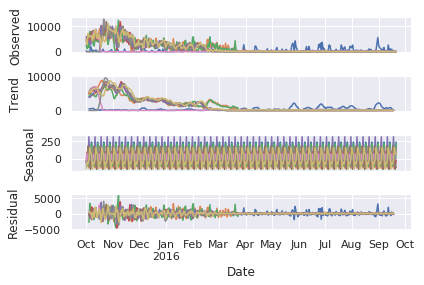

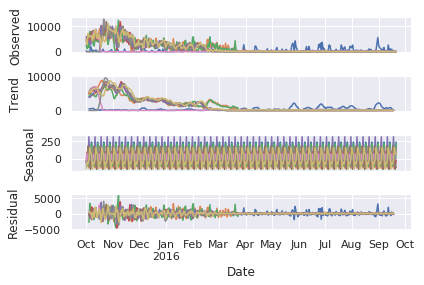

In [13]:
seasonald = sdc(df, model='additive')
seasonald.plot()

# Trend

We took rolling mean of 90 days to understand better

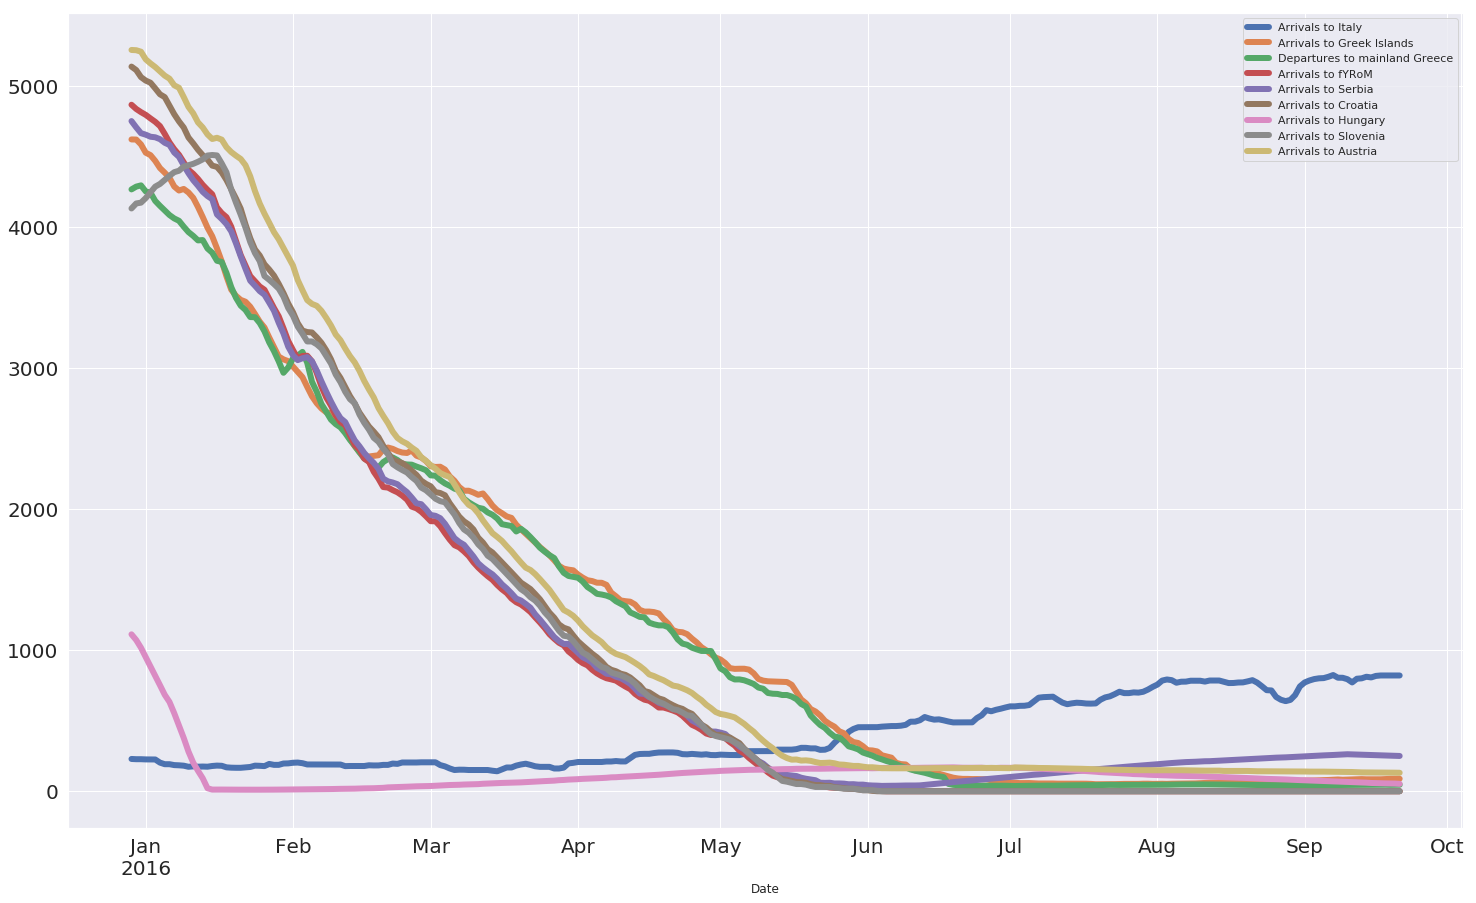

In [14]:
df.rolling(90).mean().plot(figsize=(25,15), linewidth=6, fontsize=20)

# Seasonal patterns (first order differencing)

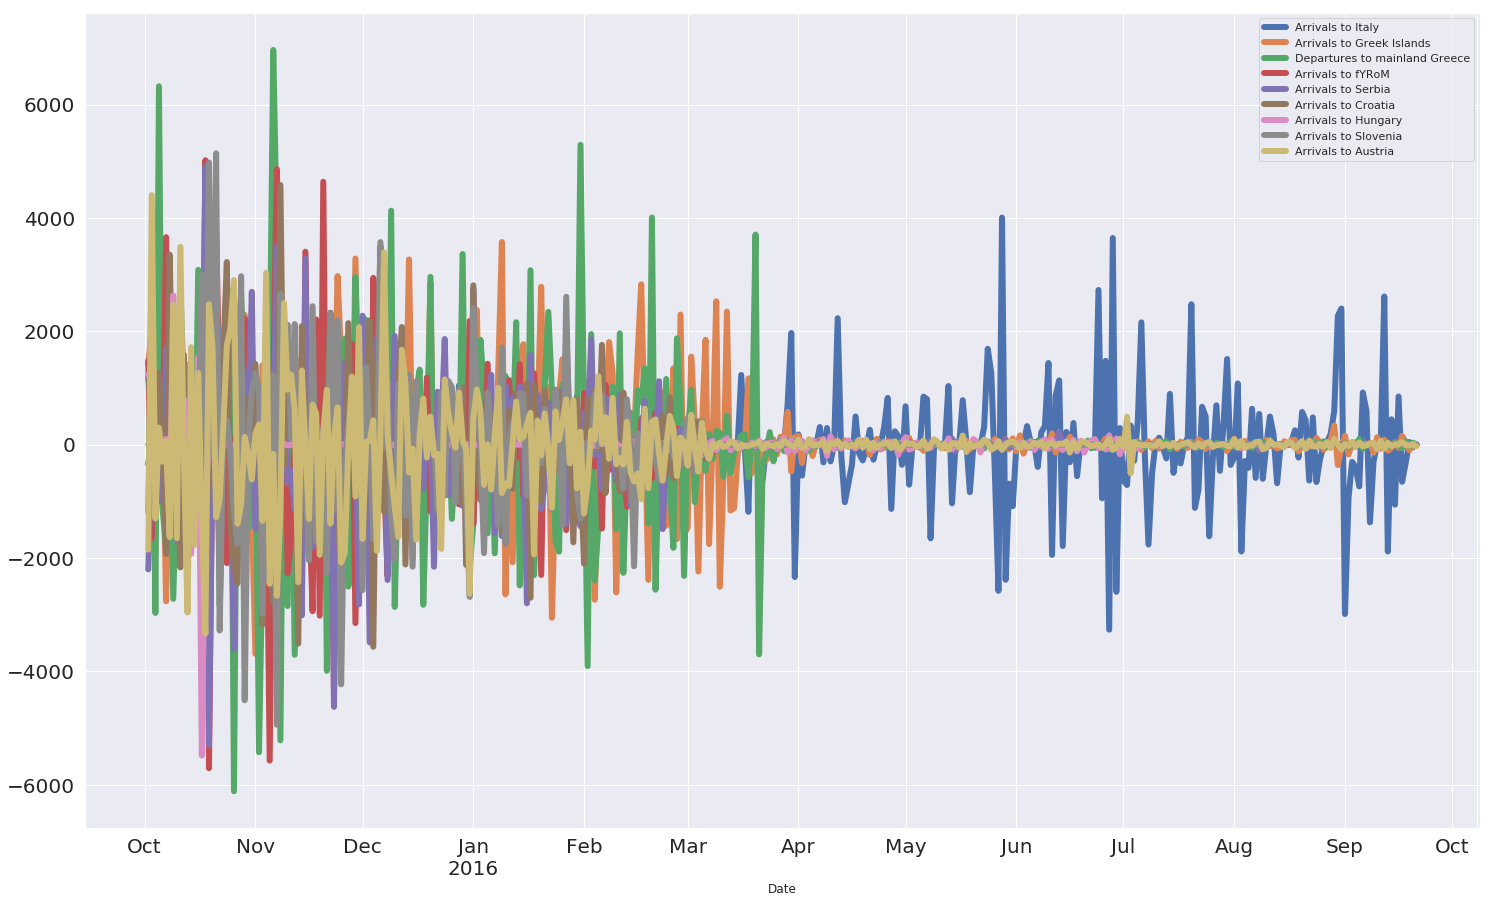

In [15]:
df.diff().plot(figsize=(25,15), linewidth=6, fontsize=20)

Seems like only "arrival in italy" has some seasonal pattern

In [16]:
italy =  df[["Arrivals to Italy"]]

In [17]:
italy.head()

Arrivals to Italy
Date                         
2015-10-01                343
2015-10-02                  0
2015-10-03                128
2015-10-04                 62
2015-10-05                  0

# Seasonal patterns on arrival in italy

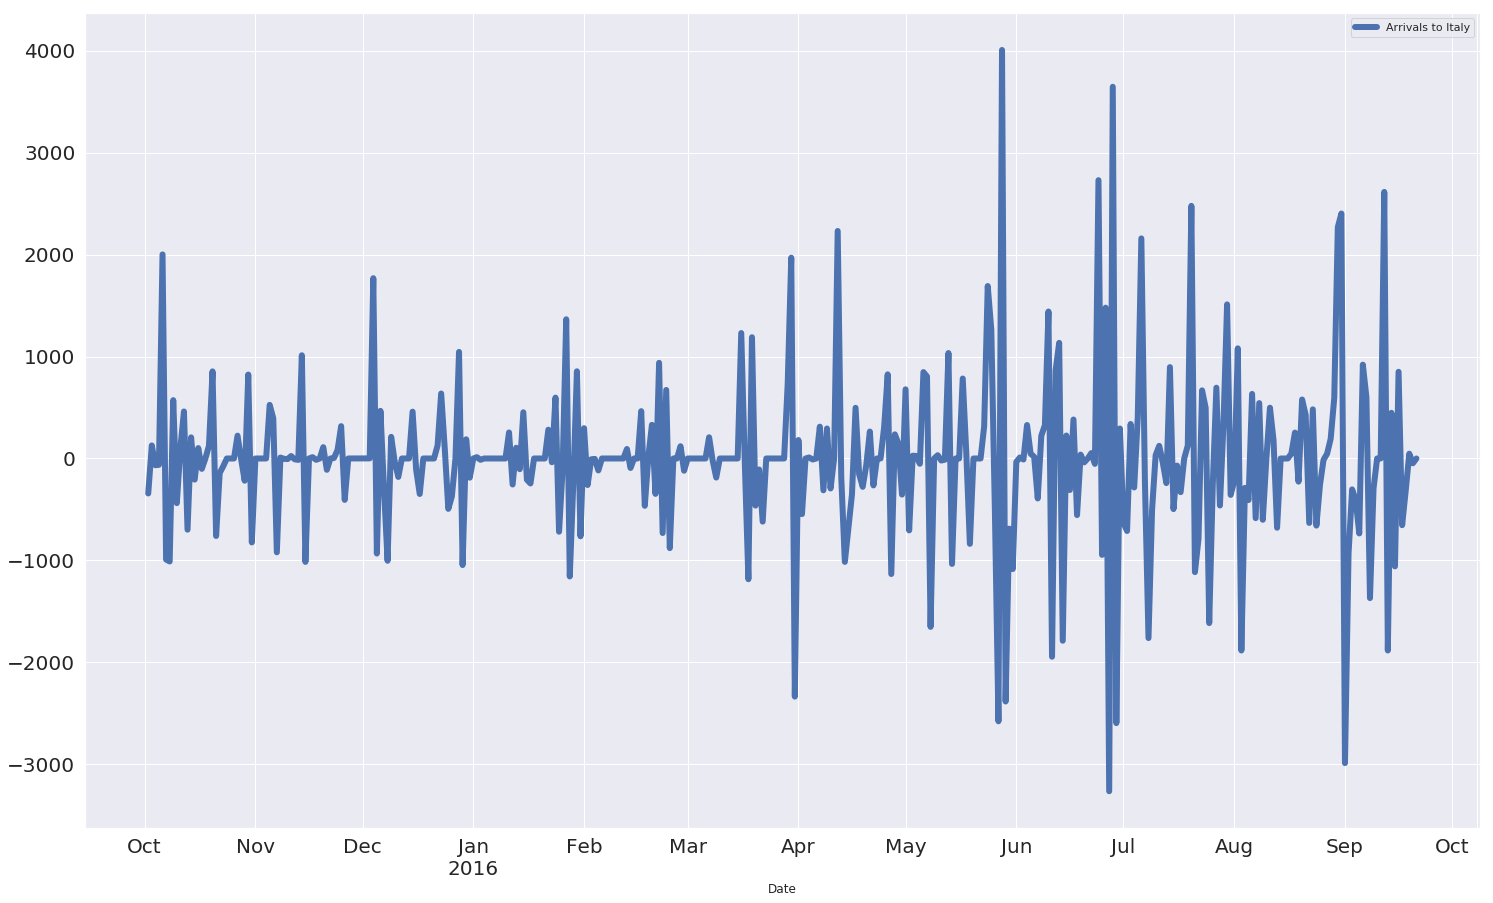

In [18]:
italy.diff().plot(figsize=(25,15), linewidth=6, fontsize=20)


# Rolling mean: Italy

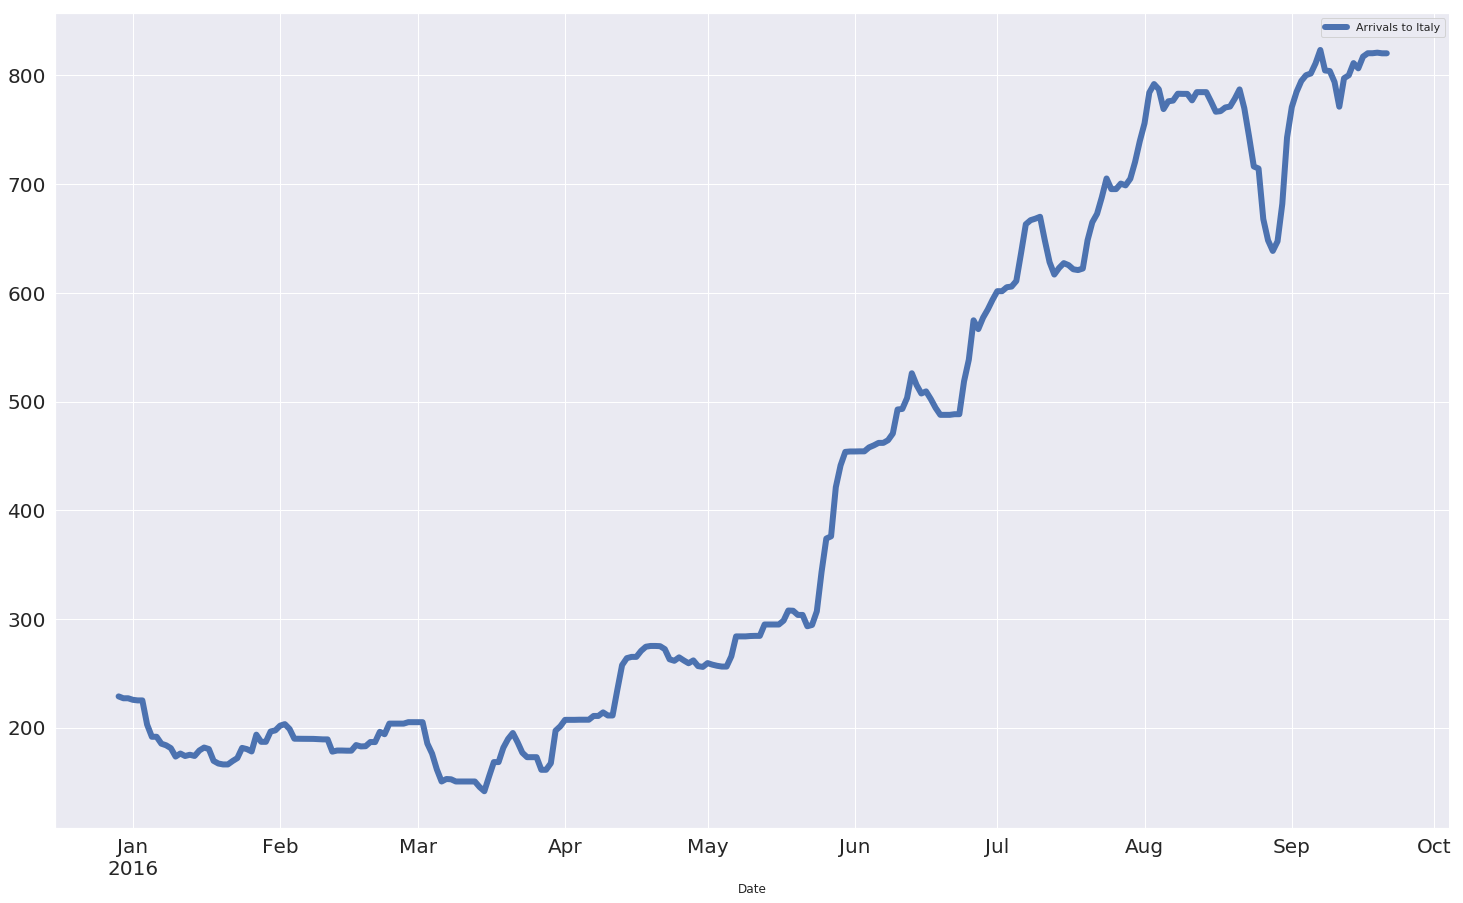

In [19]:
italy.rolling(90).mean().plot(figsize=(25,15), linewidth=6, fontsize=20)

# Autocorrelation

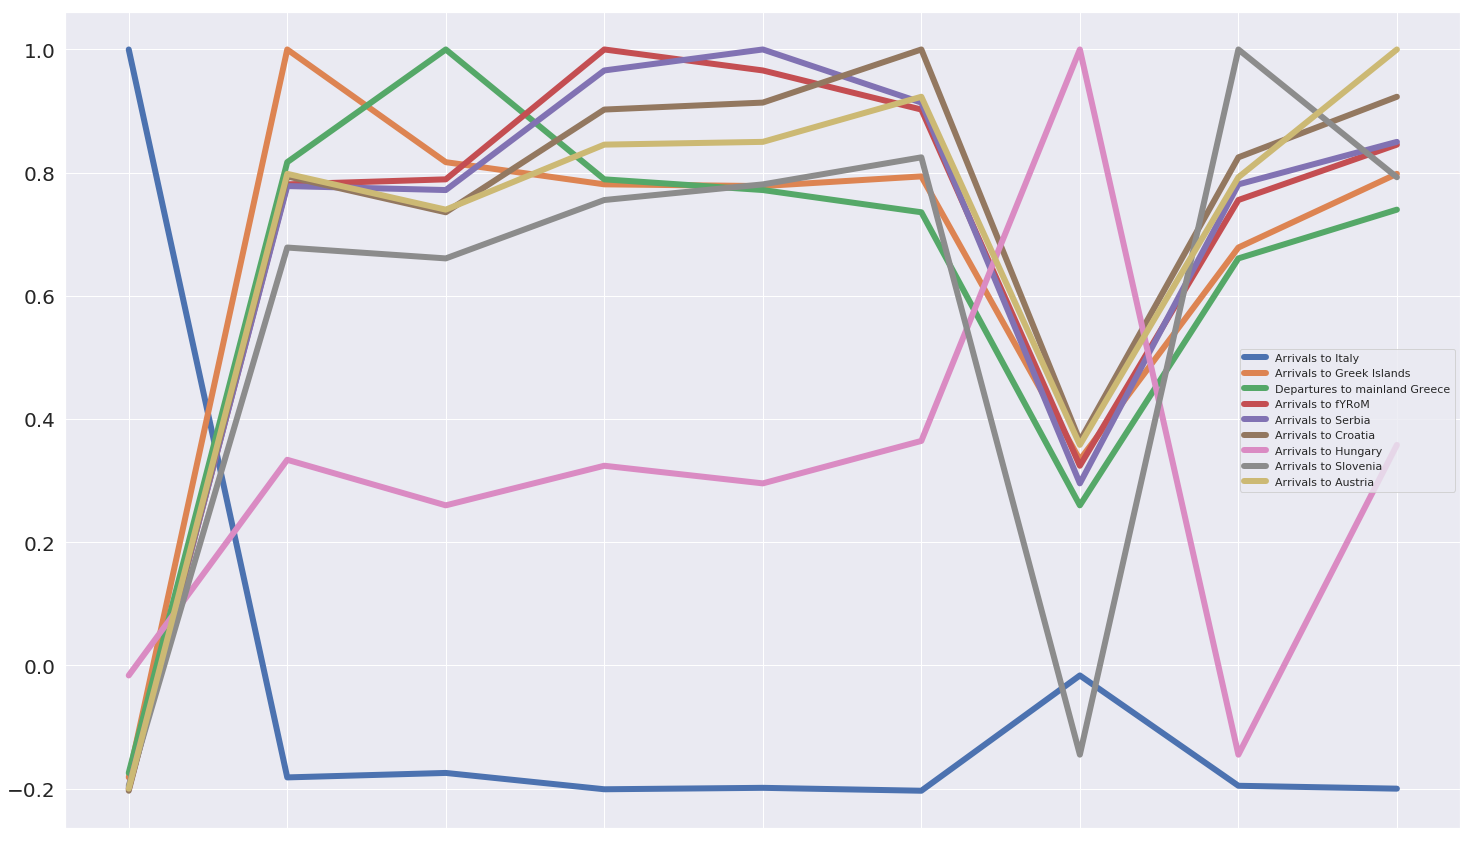

In [20]:
df.corr().plot(figsize=(25,15), linewidth=6, fontsize=20)

In [21]:
corr = df.corr()
corr

Arrivals to Italy  Arrivals to Greek Islands  \
Arrivals to Italy                       1.000000                  -0.181853   
Arrivals to Greek Islands              -0.181853                   1.000000   
Departures to mainland Greece          -0.174600                   0.817034   
Arrivals to fYRoM                      -0.201113                   0.781025   
Arrivals to Serbia                     -0.198782                   0.778219   
Arrivals to Croatia                    -0.203498                   0.793910   
Arrivals to Hungary                    -0.016318                   0.333801   
Arrivals to Slovenia                   -0.195442                   0.678417   
Arrivals to Austria                    -0.200119                   0.798082   

                               Departures to mainland Greece  \
Arrivals to Italy                                  -0.174600   
Arrivals to Greek Islands                           0.817034   
Departures to mainland Greece                       1.000000   
Arrivals to fYRoM                                   0.789143   
Arrivals to Serbia                                  0.771755   
Arrivals to Croatia                                 0.735671   
Arrivals to Hungary                                 0.259850   
Arrivals to Slovenia                                0.660769   
Arrivals to Austria                                 0.739933   

                               Arrivals to fYRoM  Arrivals to Serbia  \
Arrivals to Italy                      -0.201113           -0.198782   
Arrivals to Greek Islands               0.781025            0.778219   
Departures to mainland Greece           0.789143            0.771755   
Arrivals to fYRoM                       1.000000            0.965912   
Arrivals to Serbia                      0.965912            1.000000   
Arrivals to Croatia                     0.902436            0.913748   
Arrivals to Hungary                     0.324139            0.295517   
Arrivals to Slovenia                    0.755563            0.780946   
Arrivals to Austria                     0.845501            0.849980   

                               Arrivals to Croatia  Arrivals to Hungary  \
Arrivals to Italy                        -0.203498            -0.016318   
Arrivals to Greek Islands                 0.793910             0.333801   
Departures to mainland Greece             0.735671             0.259850   
Arrivals to fYRoM                         0.902436             0.324139   
Arrivals to Serbia                        0.913748             0.295517   
Arrivals to Croatia                       1.000000             0.364439   
Arrivals to Hungary                       0.364439             1.000000   
Arrivals to Slovenia                      0.824851            -0.144941   
Arrivals to Austria                       0.923225             0.357992   

                               Arrivals to Slovenia  Arrivals to Austria  
Arrivals to Italy                         -0.195442            -0.200119  
Arrivals to Greek Islands                  0.678417             0.798082  
Departures to mainland Greece              0.660769             0.739933  
Arrivals to fYRoM                          0.755563             0.845501  
Arrivals to Serbia                         0.780946             0.849980  
Arrivals to Croatia                        0.824851             0.923225  
Arrivals to Hungary                       -0.144941             0.357992  
Arrivals to Slovenia                       1.000000             0.792532  
Arrivals to Austria                        0.792532             1.000000

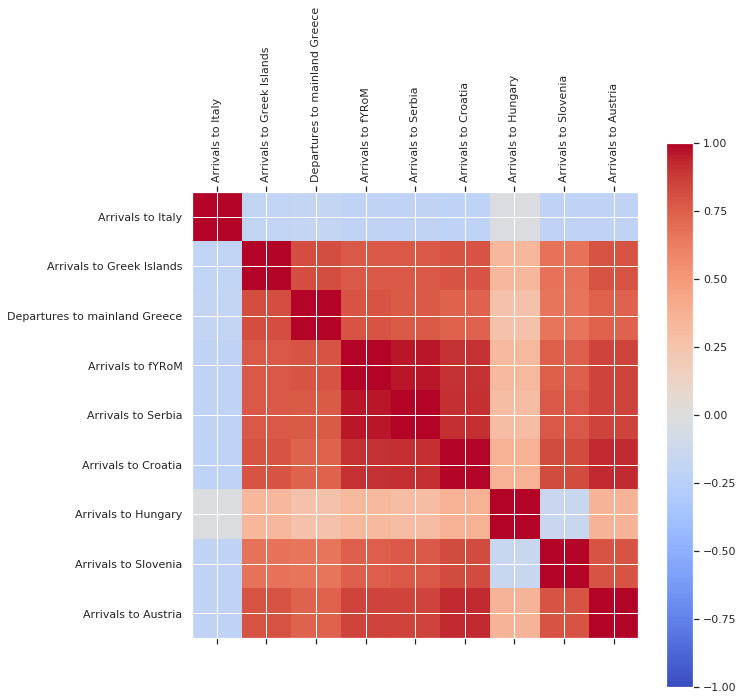

In [22]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

Arrivals to italy shows some positive correlation with other country's arrival except Hungary. However, Arrival to Hungary has a slight positive correlation with arrival to Slovenia.

# Implementation of ARIMA

Examinig the dataset, it is better to forecast only the arrival to Italy, because other arrivel has tend to be zero after middle of the time series. 

We will resample the Arrivals to Italy dataset with weekly.

In [23]:
itl = italy['Arrivals to Italy'].resample('W').mean()

In [24]:
itl.head()

Date
2015-10-04    133.250000
2015-10-11    564.857143
2015-10-18    143.857143
2015-10-25    199.857143
2015-11-01    180.714286
Freq: W-SUN, Name: Arrivals to Italy, dtype: float64

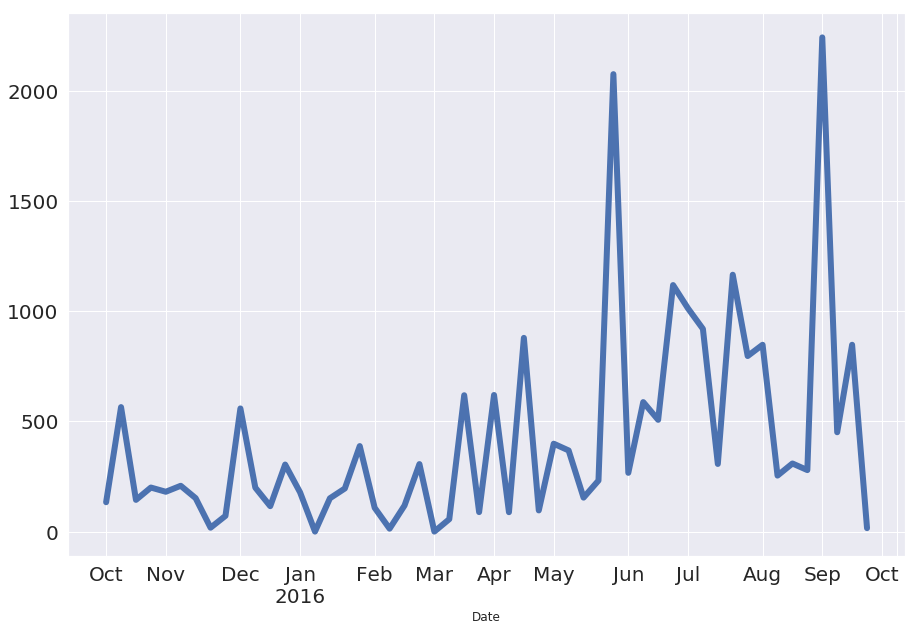

In [25]:
itl.plot(figsize=(15,10), linewidth=6, fontsize=20)
plt.show()

## Parameter selection

#### ARIMA(p,d,q)

p = Auto-regressive part of the model. 
d = integrated part of the model.
q = moving avarage part  of the model.

# Parameter selection

We use grid search, which iteratively explore different combinations of parameters. Each time we are fitting an new ARIMA model using SARIMAX() function.

In [26]:
p = d = q = range(0,2)


In [27]:
pdq = list(itertools.product(p,d,q))

In [28]:
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in list(itertools.product(p,d,q))]

In [29]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[4], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)


We will use these triplets of parameters to automate the process of training and evaluating ARIMA models. When evaluating and comparing models fitted with different parameters, each can be ranked with each other based on how well it fits the data or its ability to accurately predict future data points. Tha AIC value returned with ARIMA models fitted using statsmodels. This AIC measures how well a model fits the data. We are interested in finding lowest AIC value.

In [30]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(itl,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{}1 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)1 - AIC:804.4327263841393
SARIMAX(0, 0, 0)x(0, 0, 1, 12)1 - AIC:620.4125647353148
SARIMAX(0, 0, 0)x(0, 1, 0, 12)1 - AIC:615.3387960407662
SARIMAX(0, 0, 0)x(0, 1, 1, 12)1 - AIC:1202.6700572859604
SARIMAX(0, 0, 0)x(1, 0, 0, 12)1 - AIC:629.445231767558
SARIMAX(0, 0, 0)x(1, 0, 1, 12)1 - AIC:611.7305592078251
SARIMAX(0, 0, 0)x(1, 1, 0, 12)1 - AIC:446.77306426340624
SARIMAX(0, 0, 0)x(1, 1, 1, 12)1 - AIC:1198.6660776147262
SARIMAX(0, 0, 1)x(0, 0, 0, 12)1 - AIC:783.7396849288975
SARIMAX(0, 0, 1)x(0, 0, 1, 12)1 - AIC:603.9255104735153
SARIMAX(0, 0, 1)x(0, 1, 0, 12)1 - AIC:601.5093892480851
SARIMAX(0, 0, 1)x(0, 1, 1, 12)1 - AIC:1170.7604997748365
SARIMAX(0, 0, 1)x(1, 0, 0, 12)1 - AIC:629.2801361829506
SARIMAX(0, 0, 1)x(1, 0, 1, 12)1 - AIC:598.2288310162303
SARIMAX(0, 0, 1)x(1, 1, 0, 12)1 - AIC:447.71685704261466
SARIMAX(0, 0, 1)x(1, 1, 1, 12)1 - AIC:1163.944772805059
SARIMAX(0, 1, 0)x(0, 0, 0, 12)1 - AIC:789.3340058167618
SARIMAX(0, 1, 0)x(0, 0, 1, 12)1 - AIC:611.28

The lowest AIC here is 409.85, which was generated with SARIMAX(1,1,1)x(1,1,0,12). We are considering this as our optimal option.

## Fitting an ARIMA model

In [31]:
mod = sm.tsa.statespace.SARIMAX(itl,
                                order=(1,1,1),
                                seasonal_order=(1,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3350      0.332     -1.010      0.312      -0.985       0.315
ma.L1         -0.7998      0.165     -4.835      0.000      -1.124      -0.476
ar.S.L12      -1.2279      0.308     -3.990      0.000      -1.831      -0.625
sigma2      2.954e+05   9.08e+04      3.254      0.001    1.17e+05    4.73e+05


### Model diagonstic

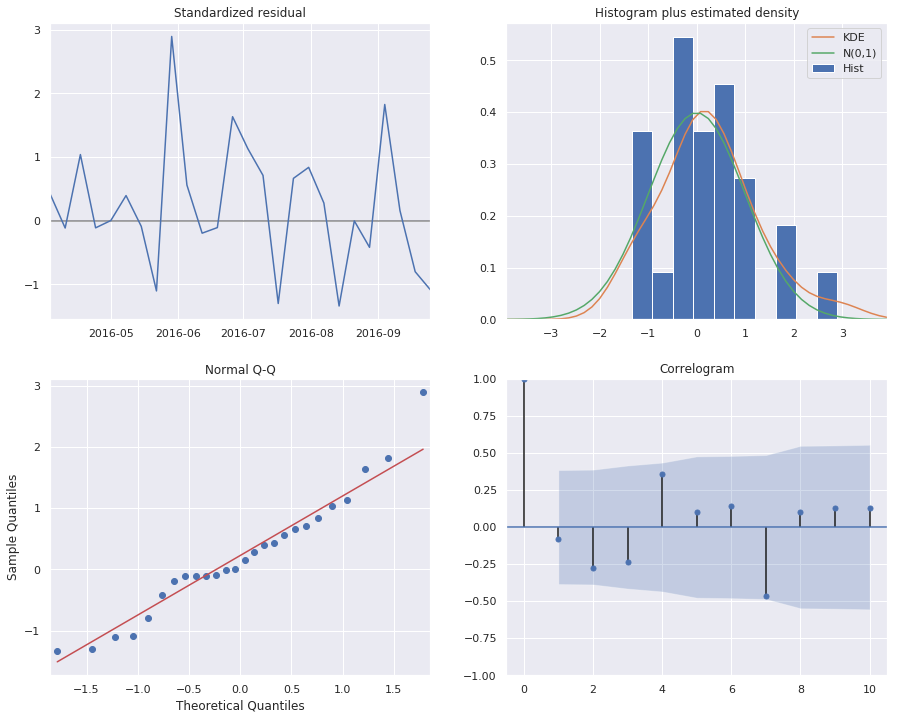

In [32]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

## Validating forecasts

We have model (results) which can be used to produced forecasts. We will be comparing predicted values to real values of time series, which will show the accuracy. get_predict() and conf_int() gives the values and associated confidence intervals for forcasts of time series.

In [33]:
pred = results.get_prediction(start=pd.to_datetime('2016-08-07'), dynamic = False)
pred_ci = pred.conf_int()

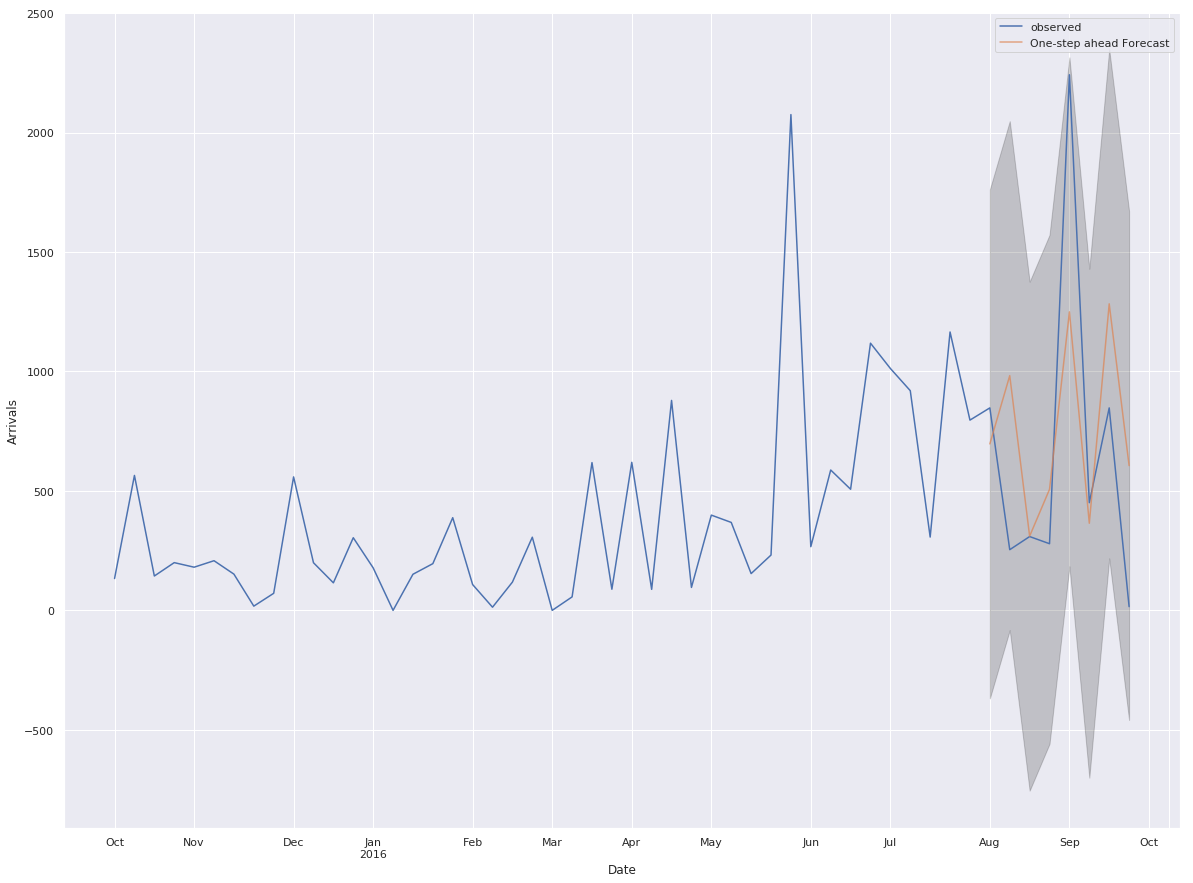

In [34]:
ax = itl['2015':].plot(label='observed', figsize=(20,15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Arrivals')
plt.legend()
plt.show()

### Root mean squared Error

In [35]:
itl_forecasted = pred.predicted_mean
itl_real = itl['2016-08-07']

In [36]:
mse = ((itl_forecasted - itl_real) ** 2).mean()
mse

136036.53103544042

In [37]:
rmse = format(round(np.sqrt(mse)))
rmse

'369.0'

# Forecast

In [38]:
pred_uc = results.get_forecast(steps=100)
pred_uci = pred_uc.conf_int()

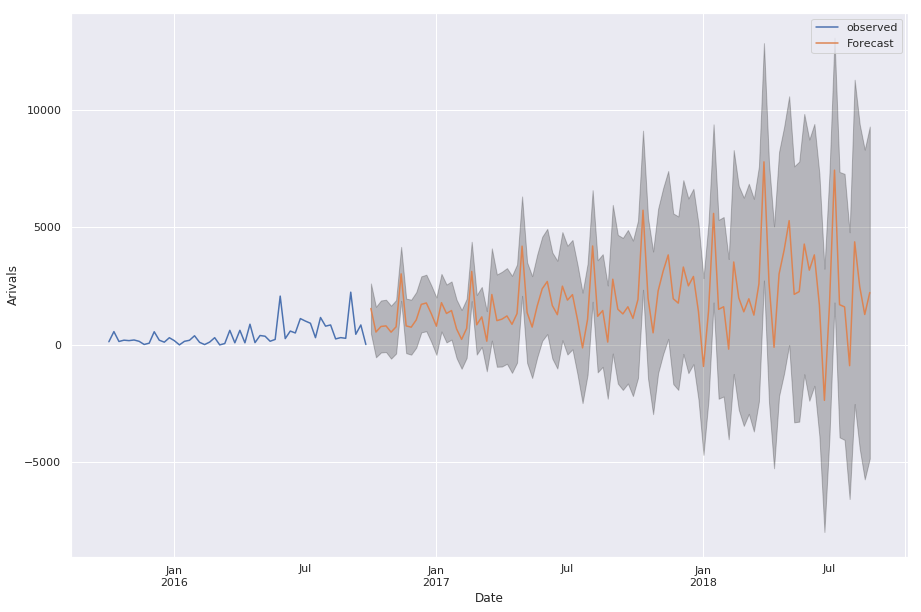

In [39]:
ax = itl.plot(label='observed', figsize=(15, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_uci.index,
                pred_uci.iloc[:, 0],
                pred_uci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Arivals')
plt.legend()
plt.show()